# Predicting the Winner of the 2021-22 Premier League

### Importing Libraries & Dataset

In [1]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import poisson

In [2]:
# Reading csv as pandas dataframe
results = pd.read_csv('results.csv', encoding = 'unicode_escape', engine ='python')
# Removing columns with NA values
results = results.dropna(axis=1)
# Viewing dataset
results

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D
...,...,...,...,...,...,...,...
11032,2021-22,2022-02-12T17:30:00Z,Norwich,Man City,0,4,A
11033,2021-22,2022-02-13T14:00:00Z,Burnley,Liverpool,0,1,A
11034,2021-22,2022-02-13T14:00:00Z,Newcastle,Aston Villa,1,0,H
11035,2021-22,2022-02-13T14:00:00Z,Tottenham,Wolves,0,2,A


### How Important is Playing in Your Home Stadium?

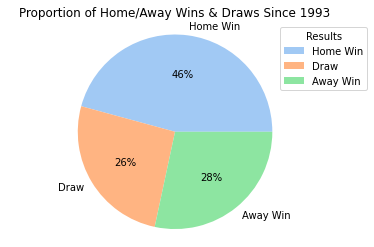

In [3]:
### Couting the number of home wins, away wins, and draws
count_home = results['FTR'].value_counts()['H']
count_away = results['FTR'].value_counts()['A']
count_draw = results['FTR'].value_counts()['D']
# Creating Pandas DataFrame of Total Home/Away Wins & Draws
count_results = {'Result': ['Home Win', 'Draw', 'Away Win'], 'Total': [count_home, count_draw, count_away]}
count_results = pd.DataFrame(count_results)

### Pie Chart
# Defining Seaborn Colour Palette
colours = sns.color_palette('pastel')
# Storing property type labels
results_label = 'Home Win','Draw','Away Win'
# Creating Pie Chart of Total Home/Away Wins & Draws
plt.pie(count_results['Total'], labels = results_label, colors = colours, autopct='%.0f%%')
# Setting plot title
plt.title('Proportion of Home/Away Wins & Draws Since 1993')
# Creating plot legend & placing outside of pie chart
plt.legend(title='Results', bbox_to_anchor = (0.8, 1))
# Setting Axes aspect to equal
plt.axis('equal')
plt.show()

### Which Team Has Scored the Most Goals Since 1993? Conceded the Most?

In [4]:
### Total Goals Scored by Teams at Home & Away
# Group by goals scored at home
home_goals_scored = results.groupby('HomeTeam')['FTHG'].sum()
# Group by goals scored away
away_goals_scored = results.groupby('AwayTeam')['FTAG'].sum()
# Append columns & rename indeces
total_goals_scored = home_goals_scored.add(away_goals_scored, fill_value=0).rename_axis('Team').reset_index(name='Goals Scored')
# Sort goals scored column be descending
total_goals_scored = total_goals_scored.sort_values(by='Goals Scored', ascending=False)

total_goals_scored.head()

,Team,Goals Scored
27,Man United,2099
0,Arsenal,1950
25,Liverpool,1926
14,Chelsea,1894
43,Tottenham,1644


In [5]:
### Total Goals Conceded by Teams at Home & Away
# Group by goals conceded at home
home_goals_conceded = results.groupby('HomeTeam')['FTAG'].sum()
# Group by goals conceded away
away_goals_conceded = results.groupby('AwayTeam')['FTHG'].sum()
# Append columns & rename indeces
total_goals_conceded = home_goals_conceded.add(away_goals_conceded, fill_value=0).rename_axis('Team').reset_index(name='Goals Conceded')
# Sort goals conceded column be descending
total_goals_conceded = total_goals_conceded.sort_values(by='Goals Conceded', ascending=False)

total_goals_conceded.head()

,Team,Goals Conceded
46,West Ham,1411
29,Newcastle,1399
18,Everton,1398
43,Tottenham,1361
1,Aston Villa,1295


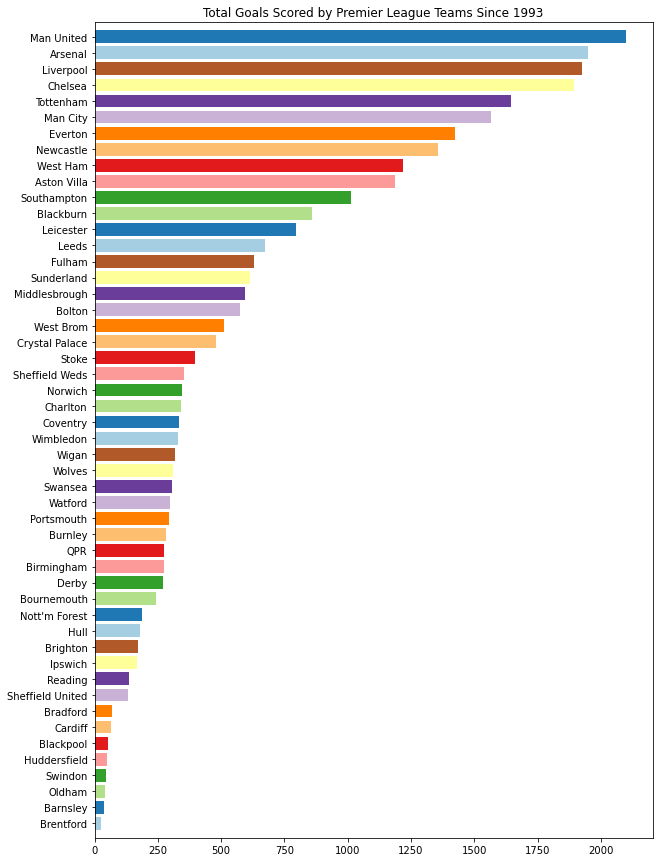

In [6]:
### Horizontal Bar Chart
# Defining Seaborn Colour Palette
colours = sns.color_palette("Paired")
# Sort goals scored by ascending
total_goals_scored_inv = total_goals_scored.sort_values(by='Goals Scored')
# Setting figure size
fig, ax = plt.subplots(figsize = (10, 15))
# Creating Horizontal Bar Chart of Total Goals Scored by Each Team
ax.barh(total_goals_scored_inv['Team'], total_goals_scored_inv['Goals Scored'], color = colours)
# Removing margins
plt.margins(y=0.01)
# Setting plot title
plt.title('Total Goals Scored by Premier League Teams Since 1993')
# Show plot
plt.show()

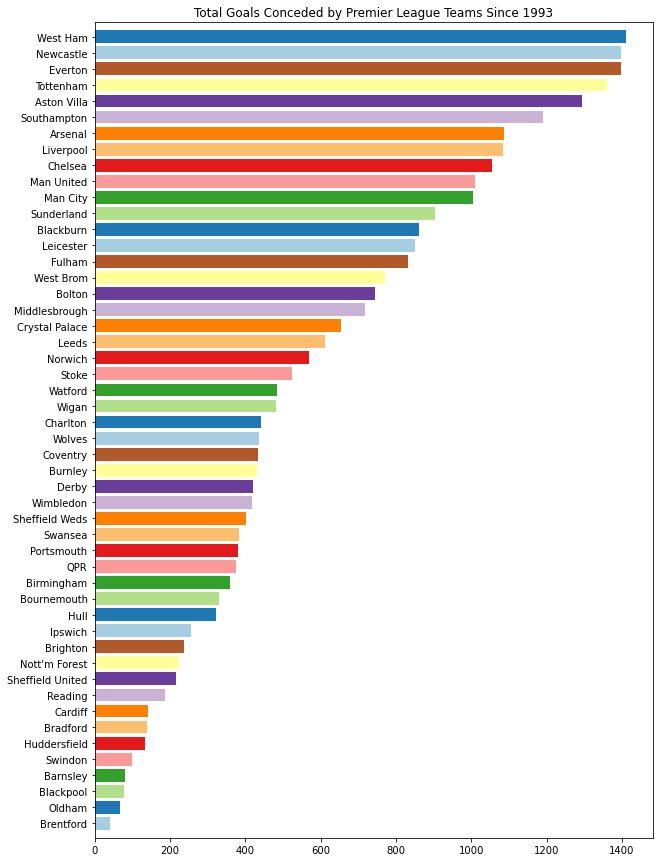

In [7]:
### Horizontal Bar Chart
# Defining Seaborn Colour Palette
colours = sns.color_palette("Paired")
# Sort goals conceded by ascending
total_goals_conceded_inv = total_goals_conceded.sort_values(by='Goals Conceded')
# Setting figure size
fig, ax = plt.subplots(figsize = (10, 15))
# Creating Horizontal Bar Chart of Total Goals Conceded by Each Team
ax.barh(total_goals_conceded_inv['Team'], total_goals_conceded_inv['Goals Conceded'], color = colours)
# Removing margins
plt.margins(y=0.01)
# Setting plot title
plt.title('Total Goals Conceded by Premier League Teams Since 1993')
# Show plot
plt.show()

### Which Teams Have Played the Most Games?

In [8]:
### Total Games Played by Each Team

# Count home games played by each team
home_games_played = results.groupby('HomeTeam').count()
# Dropping irrelevant columns
home_games_played = home_games_played.drop(columns = ['Season', 'DateTime', 'FTHG', 'FTAG', 'FTR'])

# Count home games played by each team
away_games_played = results.groupby('AwayTeam').count()
# Dropping irrelevant columns
away_games_played = away_games_played.drop(columns = ['Season', 'DateTime', 'FTHG', 'FTAG', 'FTR'])

# Append columns & rename index
total_games_played = home_games_played.add(away_games_played, fill_value=0).rename_axis('Team')
# Create total games played column by summing home & away games
total_games_played['Games Played'] = total_games_played['HomeTeam'] + total_games_played['AwayTeam']
# Converting variable to integer type
total_games_played['Games Played'] = total_games_played['Games Played'].astype(int)
# Dropping home & away columns
total_games_played = total_games_played.drop(columns = ['HomeTeam', 'AwayTeam'])
# Sort goals conceded column be descending
total_games_played = total_games_played.sort_values(by='Games Played', ascending=False)
# Resetting Index
total_games_played.reset_index(inplace=True)
# Total Games Played by Each Team
total_games_played.head(6)

,Team,Games Played
0,Liverpool,1096
1,Chelsea,1096
2,Man United,1096
3,Tottenham,1094
4,Everton,1094
5,Arsenal,1094


### Which Team Scores the Most Goals Per Game?

In [9]:
### Goals Scored Per Game by Each Team

# Merging total games played & total goals scored tables
average_goals = pd.merge(total_games_played, total_goals_scored, on='Team')
# Merging total games played & total goals scored tables
average_goals = pd.merge(average_goals, total_goals_conceded, on='Team')
# Creating average goals scored per game column
average_goals['Goals Scored Per Game'] = average_goals['Goals Scored']/average_goals['Games Played']
# Creating average goals conceded per game column
average_goals['Goals Conceded Per Game'] = average_goals['Goals Conceded']/average_goals['Games Played']
# Creating average goal difference per game column
average_goals['Goal Difference Per Game'] = (average_goals['Goals Scored']-average_goals['Goals Conceded'])/average_goals['Games Played']


# Sorting by average goals scored per game
average_goals.sort_values(by='Goals Scored Per Game', ascending = False).head()

,Team,Games Played,Goals Scored,Goals Conceded,Goals Scored Per Game,Goals Conceded Per Game,Goal Difference Per Game
2,Man United,1096,2099,1010,1.915146,0.921533,0.993613
5,Arsenal,1094,1950,1087,1.782450,0.993601,0.788848
0,Liverpool,1096,1926,1085,1.757299,0.989964,0.767336
1,Chelsea,1096,1894,1056,1.728102,0.963504,0.764599
9,Man City,907,1564,1005,1.724366,1.108049,0.616318


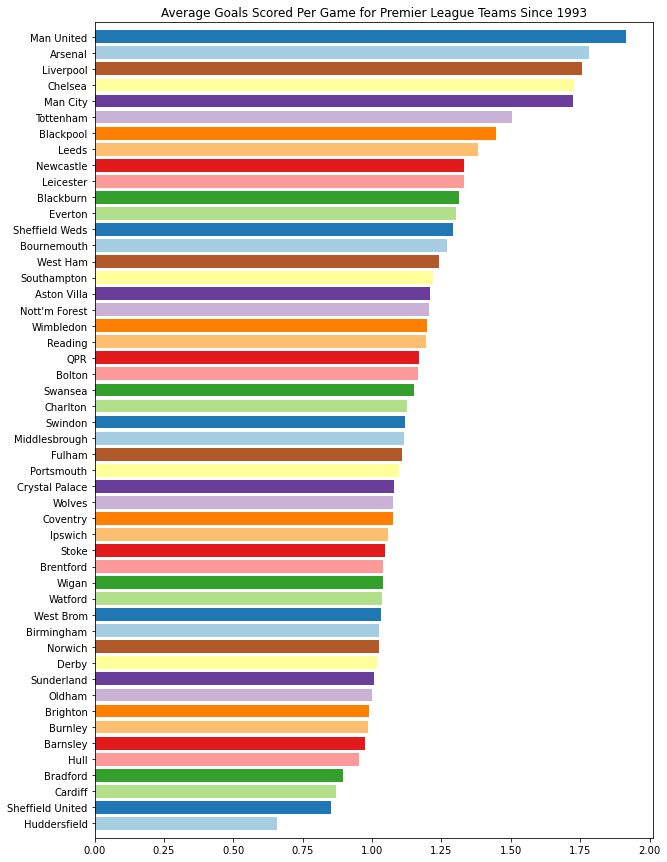

In [10]:
### Horizontal Bar Chart
# Defining Seaborn Colour Palette
colours = sns.color_palette("Paired")
# Sort average goals scored by ascending average_scored
average_scored = average_goals.sort_values(by='Goals Scored Per Game')
# Setting figure size
fig, ax = plt.subplots(figsize = (10, 15))
# Creating Horizontal Bar Chart of Total Goals Conceded by Each Team
ax.barh(average_scored['Team'], average_scored['Goals Scored Per Game'], color = colours)
# Removing margins
plt.margins(y=0.01)
# Setting plot title
plt.title('Average Goals Scored Per Game for Premier League Teams Since 1993')
# Show plot
plt.show()

### Which Team Concedes the Most Goals Per Game?

In [11]:
# Sorting by average goals conceded per game
average_goals.sort_values(by='Goals Conceded Per Game', ascending = False).head()

,Team,Games Played,Goals Scored,Goals Conceded,Goals Scored Per Game,Goals Conceded Per Game,Goal Difference Per Game
46,Swindon,42,47,100,1.119048,2.380952,-1.261905
47,Barnsley,38,37,82,0.973684,2.157895,-1.184211
48,Blackpool,38,55,78,1.447368,2.052632,-0.605263
43,Cardiff,76,66,143,0.868421,1.881579,-1.013158
42,Bradford,76,68,138,0.894737,1.815789,-0.921053


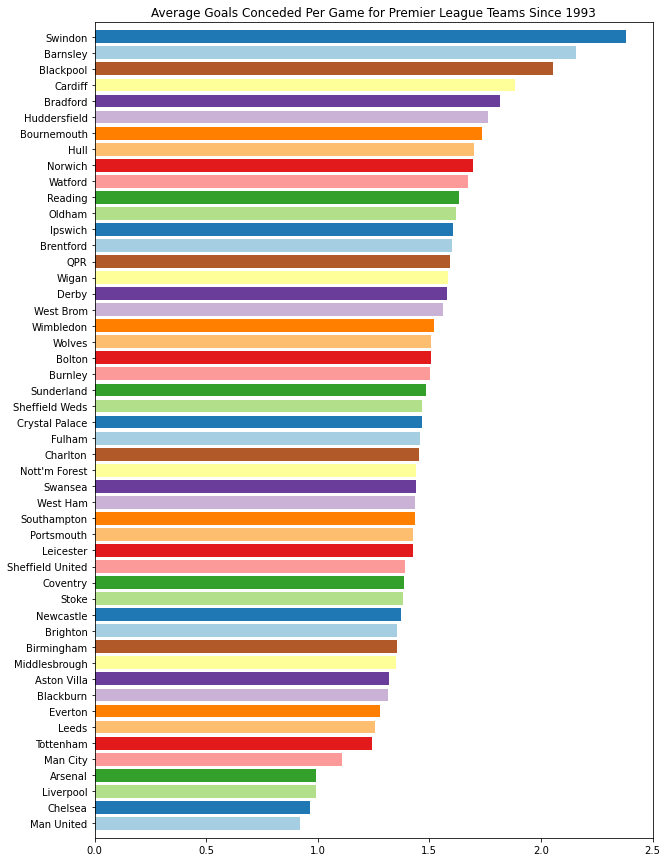

In [12]:
### Horizontal Bar Chart
# Defining Seaborn Colour Palette
colours = sns.color_palette("Paired")
# Sort average goals conceded by ascending average_scored
average_conceded = average_goals.sort_values(by='Goals Conceded Per Game')
# Setting figure size
fig, ax = plt.subplots(figsize = (10, 15))
# Creating Horizontal Bar Chart of Total Goals Conceded by Each Team
ax.barh(average_conceded['Team'], average_conceded['Goals Conceded Per Game'], color = colours)
# Removing margins
plt.margins(y=0.01)
# Setting plot title
plt.title('Average Goals Conceded Per Game for Premier League Teams Since 1993')
# Show plot
plt.show()

### Which Team has the Best Goal Difference Per Game?

In [13]:
# Sorting by average goals conceded per game
average_goals.sort_values(by='Goal Difference Per Game', ascending = False).head()

,Team,Games Played,Goals Scored,Goals Conceded,Goals Scored Per Game,Goals Conceded Per Game,Goal Difference Per Game
2,Man United,1096,2099,1010,1.915146,0.921533,0.993613
5,Arsenal,1094,1950,1087,1.782450,0.993601,0.788848
0,Liverpool,1096,1926,1085,1.757299,0.989964,0.767336
1,Chelsea,1096,1894,1056,1.728102,0.963504,0.764599
9,Man City,907,1564,1005,1.724366,1.108049,0.616318


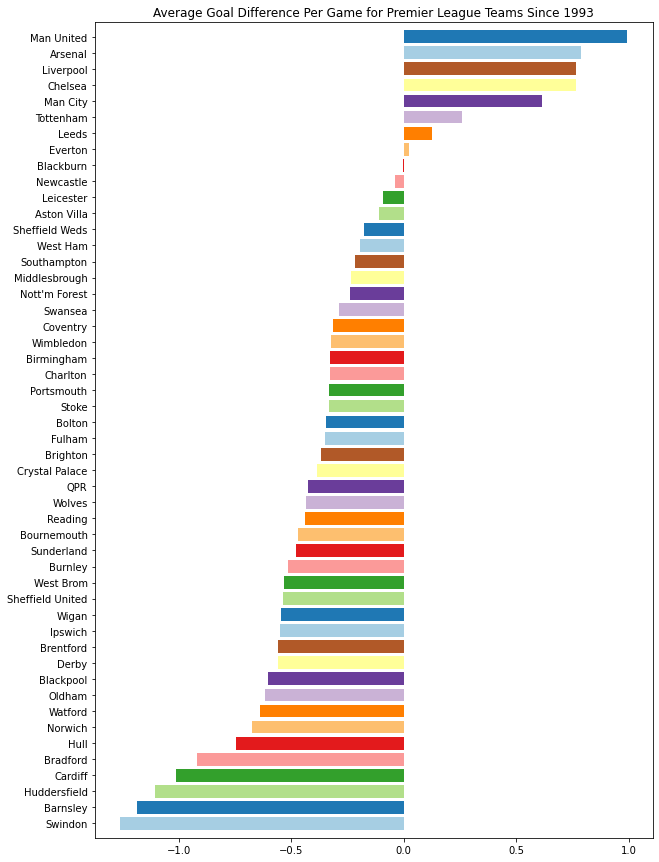

In [14]:
### Horizontal Bar Chart
# Defining Seaborn Colour Palette
colours = sns.color_palette("Paired")
# Sort average goal difference by ascending average_scored
average_diff = average_goals.sort_values(by='Goal Difference Per Game')
# Setting figure size
fig, ax = plt.subplots(figsize = (10, 15))
# Creating Horizontal Bar Chart of Total Goals Conceded by Each Team
ax.barh(average_diff['Team'], average_diff['Goal Difference Per Game'], color = colours)
# Removing margins
plt.margins(y=0.01)
# Setting plot title
plt.title('Average Goal Difference Per Game for Premier League Teams Since 1993')
# Show plot
plt.show()

# EPL 2020/21 Season

It appears that the `results` data set only provides the number of goals scored by each team in each game.

We can create 2 new columns, `HomePoints` and `AwayPoints`, which are categorical variables representing the result for each team in the game, and can be one of 3 values: win/draw/loss. These values will be represented as the number of points rewarded to each time (e.g., 3 points for a win, 1 point for a draw, 0 points for a loss).

In [15]:
# Calculating points for home team
results['HomePoints'] = np.where(
    results['FTR'] == 'D', 1, np.where(
    results['FTR'] ==  'H', 3, 0))

# Calculating points for away team
results['AwayPoints'] = np.where(
    results['FTR'] == 'D', 1, np.where(
    results['FTR'] == 'A', 3, 0))

results.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomePoints,AwayPoints
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,0,3
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,3,0
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,0,3
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,3,0
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,1,1


### Which Team Won The Premier League in the 2020/21 Season?

To calculate which team won the league in the first season, we obtain a dataframe of the 2020/21 season games.

In [16]:
# Creating dataframe of 2021/22 EPL results
results_2020 = results[results['Season'] == '2020-21']
results_2020

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomePoints,AwayPoints
10424,2020-21,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A,0,3
10425,2020-21,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H,3,0
10426,2020-21,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H,3,0
10427,2020-21,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A,0,3
10428,2020-21,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A,0,3
...,...,...,...,...,...,...,...,...,...
10799,2020-21,2021-05-23T16:00:00Z,Liverpool,Crystal Palace,2,0,H,3,0
10800,2020-21,2021-05-23T16:00:00Z,Man City,Everton,5,0,H,3,0
10801,2020-21,2021-05-23T16:00:00Z,Sheffield United,Burnley,1,0,H,3,0
10802,2020-21,2021-05-23T16:00:00Z,West Ham,Southampton,3,0,H,3,0


We can use the `groupby()` function to calculate the team which accumulated the most points over the season.

In [17]:
# Using groupby() to sum each teams points and the number of goals they scored/conceded

# Summing each teams points at home
home_2020 = results_2020.groupby(['HomeTeam'])[['HomePoints']].sum()
home_2020.rename(columns={'HomeTeam':'TeamName'}, inplace=True)

# Summing each teams points away
away_2020 = results_2020.groupby(['AwayTeam'])[['AwayPoints']].sum()
away_2020.rename(columns={'AwayTeam':'TeamName'}, inplace=True)

# Merging home and away points
merged = home_2020.join(away_2020)
merged['Points'] = merged['HomePoints'] + merged['AwayPoints']

# Sorting the table by descending order, according to points
table_2020 = merged.sort_values(['Points'], ascending=False)
# Removing HomePoints and AwayPoints variables
table_2020 = table_2020.drop(['HomePoints', 'AwayPoints'], 1)

# View season 1 final table
table_2020

C:\Users\STEPHE~1\AppData\Local\Temp/ipykernel_2708/380601480.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  table_2020 = table_2020.drop(['HomePoints', 'AwayPoints'], 1)


,Points
HomeTeam,
Man City,86
Man United,74
Liverpool,69
Chelsea,67
Leicester,66
West Ham,65
Tottenham,62
Arsenal,61
Leeds,59


We can see that **Manchester City** were the winners of last season!

# Predicting The Winner of the 2021/22 EPL


In order to predict the outcome of a football match, a metric that represents the strength of each team would be of great use.

Generally speaking, teams that have scored more goals in the past can be expected to have a greater likelihood of scoring goals in the future. This concept will be the basis which we build our model off of.

We start by visualising the number of goals in every match:

C:\Users\Stephen Gallagher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-1.0, 12.0)

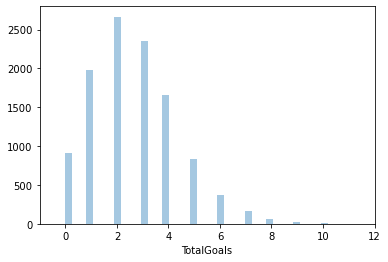

In [18]:
# Calculating the total number of goals scored by both teams in a game
results['TotalGoals'] = results['FTHG'] + results['FTAG']

# Density Plot and Histogram of all arrival delays
sns.distplot(results['TotalGoals'], kde=False)
plt.xlim(-1, 12)

In [19]:
results.sort_values(by='TotalGoals', ascending=False)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomePoints,AwayPoints,TotalGoals
5555,2007-08,2007-09-29T00:00:00Z,Portsmouth,Reading,7,4,H,3,0,11
5678,2007-08,2007-12-29T00:00:00Z,Tottenham,Reading,6,4,H,3,0,10
7029,2011-12,2011-08-28T00:00:00Z,Man United,Arsenal,8,2,H,3,0,10
7572,2012-13,2012-12-29T00:00:00Z,Arsenal,Newcastle,7,3,H,3,0,10
6370,2009-10,2009-11-22T00:00:00Z,Tottenham,Wigan,9,1,H,3,0,10
...,...,...,...,...,...,...,...,...,...,...
3361,2001-02,2001-12-15T00:00:00Z,Bolton,Charlton,0,0,D,1,1,0
10016,2018-19,2019-04-27T00:00:00Z,Crystal Palace,Everton,0,0,D,1,1,0
8201,2014-15,2014-09-27T00:00:00Z,Sunderland,Swansea,0,0,D,1,1,0
719,1994-95,1995-01-14T00:00:00Z,Man City,Coventry,0,0,D,1,1,0


The distribution of the number of goals in a match seems to follow the shape of a **Poisson distribution**.

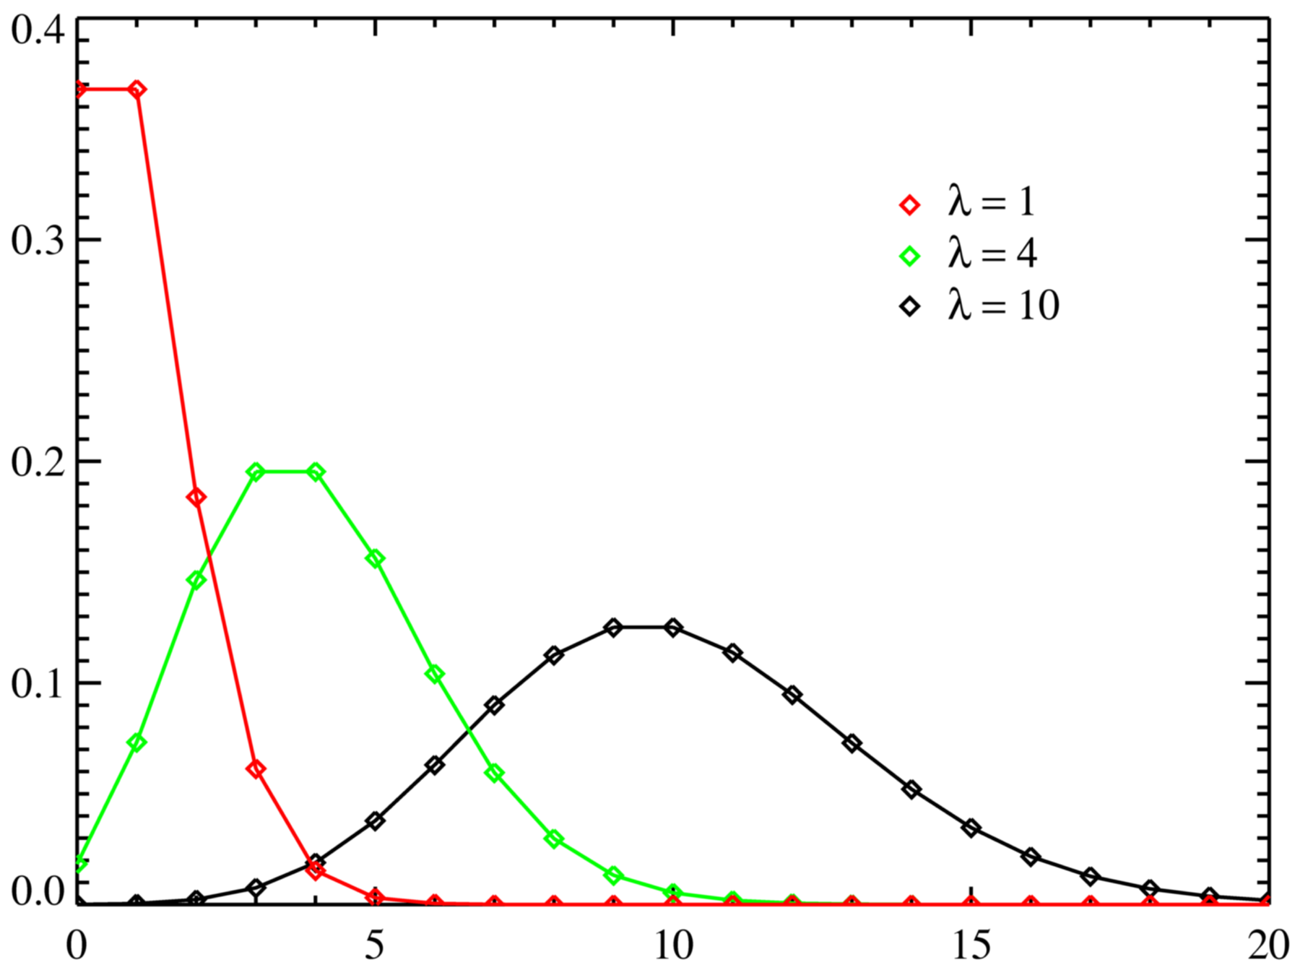

By definition, the Poisson distribution can be used to measure the probability of independent events occurring a certain number of times within a set period.

The Poisson distribution applies to football since the occurrence of one game/goal does not affect the probability of another game/goal. Additionally, the exact timing of events (a goal) is random, and goals are discrete variables.

So, we can treat the number of goals scored by a team at home and away as two independent Poisson distributions.

### Building a Poisson Regression Model

In order to predict the outcome of a match, we need a metric to represent the strength of each team.

To build this metric, we take the mean of the goals each team scored/conceded when playing at home/away. This metric is then normalised by dividing the values by the mean, over every team, of all goals scored/conceded when playing at home/away.

In [20]:
# Using groupby() to find the average number of goals each team scored/conceded when playing at home/away
# Averaging each teams goals scored/conceded at home
score_concede_home_2020 = results_2020.groupby(['HomeTeam'])[['FTHG', 'FTAG']].mean()
score_concede_home_2020.rename(columns={'FTAG':'HomeConceded', 'FTHG':'HomeScored'}, inplace=True)

# Averaging each teams goals scored/conceded away
score_concede_away_2020 = results_2020.groupby(['AwayTeam'])[['FTAG', 'FTHG']].mean()
score_concede_away_2020.rename(columns={'FTHG':'AwayConceded', 'FTAG':'AwayScored'}, inplace=True)

# Merging home and away goals scored/conceded
home_away_2020 = score_concede_home_2020.join(score_concede_away_2020)

# Calculating the average goals scored/conceded when playing at home/away for all teams
average_home_scored_2020 = score_concede_home_2020['HomeScored'].mean()
average_home_conceded_2020 = score_concede_home_2020['HomeConceded'].mean()
average_away_scored_2020 = score_concede_away_2020['AwayScored'].mean()
average_away_conceded_2020 = score_concede_away_2020['AwayConceded'].mean()
# Normalising
home_away_2020['HomeScored'] /= average_home_scored_2020
home_away_2020['HomeConceded'] /= average_home_conceded_2020
home_away_2020['AwayScored'] /= average_away_scored_2020
home_away_2020['AwayConceded'] /= average_away_conceded_2020

# Viewing results
home_away_2020.round(2)

,HomeScored,HomeConceded,AwayScored,AwayConceded
HomeTeam,,,,
Arsenal,0.93,0.82,1.22,0.70
Aston Villa,1.13,1.06,1.02,0.74
Brighton,0.86,0.86,0.71,0.93
Burnley,0.54,1.06,0.75,1.09
Chelsea,1.21,0.71,1.06,0.70
Crystal Palace,0.78,1.25,0.82,1.32
Everton,0.93,1.10,0.90,0.78
Fulham,0.35,1.10,0.71,0.97
Leeds,1.09,0.82,1.33,1.28


Over the 2020/21 EPL Season, on average, Manchester City scored the most goals at home (`HomeScored = 1.67`), and Fulham scored the least (`HomeScored = 0.35`). 

On average, Manchester City scored the most goals away from home (`AwayScored = 1.57`), and Sheffield United scored the least (`AwayScored = 0.31`).

On average, Manchester City conceded the least goals at home (`HomeConceded = 0.67`), and West Brom conceded the most (`Home Conceded = 1.53`).

On average, Manchester City conceded the least goals away from home (`AwayConceded = 0.58`), and Southampton conceded the most (`Home Conceded = 1.67`).

We need to account for the 3 teams that were promoted into the EPL for the 2021/22 Season: Brentford, Norwich, and Watford. There are several approaches to this problem, such as using the results of these teams in the current 2021/22 Season, or using data from previous seasons that these teams were in the Premier League. Since the 2021/22 season is Brentford's first time in the EPL, and for ease of coding, we will use these promoted teams 2021/22 results as a measure of team strength. The obvious caveat here is that we are no longer predicting the winner of the EPL **only** using data from the 2020/21 season. Nonetheless, these teams are highly unlikely to content for the title after only achieving promotion to the EPL.

In [21]:
# Creating dataframe of 2021/22 EPL results
results_2021 = results[results['Season'] == '2021-22']

# Using groupby() to find the average number of goals each team scored/conceded when playing at home/away
# Averaging each teams goals scored/conceded at home
score_concede_home_2021 = results_2021.groupby(['HomeTeam'])[['FTHG', 'FTAG']].mean()
score_concede_home_2021.rename(columns={'FTAG':'HomeConceded', 'FTHG':'HomeScored'}, inplace=True)

# Averaging each teams goals scored/conceded away
score_concede_away_2021 = results_2021.groupby(['AwayTeam'])[['FTAG', 'FTHG']].mean()
score_concede_away_2021.rename(columns={'FTHG':'AwayConceded', 'FTAG':'AwayScored'}, inplace=True)

# Merging home and away goals scored/conceded
home_away_2021= score_concede_home_2021.join(score_concede_away_2021)

# Calculating the average goals scored/conceded when playing at home/away for all teams
average_home_scored_2021 = score_concede_home_2021['HomeScored'].mean()
average_home_conceded_2021 = score_concede_home_2021['HomeConceded'].mean()
average_away_scored_2021 = score_concede_away_2021['AwayScored'].mean()
average_away_conceded_2021 = score_concede_away_2021['AwayConceded'].mean()
# Normalising
home_away_2021['HomeScored'] /= average_home_scored_2021
home_away_2021['HomeConceded'] /= average_home_conceded_2021
home_away_2021['AwayScored'] /= average_away_scored_2021
home_away_2021['AwayConceded'] /= average_away_conceded_2021

# Only viewing newly promoted teams
home_away_2021 = home_away_2021.filter(items = ['Brentford', 'Norwich', 'Watford'], axis=0)
home_away_2021

,HomeScored,HomeConceded,AwayScored,AwayConceded
HomeTeam,,,,
Brentford,0.715248,1.033268,0.795785,1.255243
Norwich,0.408713,1.519512,0.434065,1.488430
Watford,0.608812,1.777829,0.868130,0.952595


In [22]:
# Appending promoted teams to team strength dataframe
home_away = home_away_2020.append(home_away_2021)
# Removing relegated teams from team strength dataframe
home_away = home_away.drop(['Fulham', 'Sheffield United', 'West Brom'])
home_away

,HomeScored,HomeConceded,AwayScored,AwayConceded
HomeTeam,,,,
Arsenal,0.933852,0.823529,1.215686,0.700389
Aston Villa,1.128405,1.058824,1.019608,0.739300
Brighton,0.856031,0.862745,0.705882,0.933852
Burnley,0.544747,1.058824,0.745098,1.089494
Chelsea,1.206226,0.705882,1.058824,0.700389
Crystal Palace,0.778210,1.254902,0.823529,1.322957
Everton,0.933852,1.098039,0.901961,0.778210
Leeds,1.089494,0.823529,1.333333,1.284047
Leicester,1.322957,1.176471,1.333333,0.778210


Now that we have this metric of team strength, we can begin to predict possible outcomes for fixtures in the 2021/22 EPL Season.

### Poisson Distribution of Goals Scored

Recall the formula for the Poisson distribution: $P(X=x)=\frac{\lambda^x e^{-\lambda}}{x!}$.

In our case, $x$ represents the number of goals scored, and $\lambda$ represents the probability of a goal scored by the home or away team. (where $\lambda_{home}$=`HomeScored`x`AwayConceded` and $\lambda_{away}$=`AwayScored`x`HomeConceded`.

Since 1993, the most goals scored by a home team is 9, and has only been done 3 times, most recently being in the 2020/21 Season when Manchester United beat Southamption 9-0 at home. The most goals scored by an away team is also 9, and has only been done once when Leicester beat Southampton 0-9 in Southamptons own stadium. 

This information helps us to set a limit of 9 on the number of goals scored by the home or away team in each prediction.

The outcome of each match is classified into 3 categories: win, loss or draw. Thus, a separate table can be created that predicts the outcome of every game in the 2021/22 EPL Season, and attributes 3/1/0 points for a win/loss/draw respectively.

In [34]:
def predict_outcomes(home, away):
    
    if home in home_away.index and away in home_away.index:
        # Calculating lambda's
        lambda_home = home_away.at[home, 'HomeScored'] * home_away.at[away, 'AwayConceded']
        lambda_away = home_away.at[away, 'AwayScored'] * home_away.at[home, 'HomeConceded']

        # Initialising probabilities of each outcome
        prob_home, prob_away, prob_draw = 0, 0, 0

        # Looping over the number of goals scored by home team
        for a in range(0,9):
            # Looping over the number of goals scored by away team
            for b in range(0, 9):
                # Using the poisson.pmf function to calculate probabilities
                p = poisson.pmf(a, lambda_home) * poisson.pmf(b, lambda_away)
                # Probability of a draw
                if a == b:
                    prob_draw += p
                # Probability of a home win
                elif a > b:
                    prob_home += p
                # Probability of an away win
                else:
                    prob_away += p

        # 3 points for a win, 1 point for a draw
        pts_home = 3*prob_home + prob_draw
        pts_away = 3*prob_away + prob_draw
        return (pts_home, pts_away)
    else:
        return(0,0)

In order to implement these results on the 2021/22 fixtures, we create a table of fixtures which only contains team names. we also create an empty 2021/22 season table with 0 points at the start of the season for each team.

The list of 2021/22 EPL Fixtures was downloaded from the "bettingexpert" website:
https://www.bettingexpert.com/news/football/football-league-21-22-fixture-downloads-2021-07-19-114929

In [35]:
# Reading csv as pandas dataframe
fixtures = pd.read_csv('England-Premier-League-fixture-2021-2022.csv')
# Removing irrelevant columns
fixtures = fixtures.drop(columns = ['League'])
# Renaming columns to match results dataframe
fixtures = fixtures.replace({'Home': {'Leicester City':'Leicester',
                                  'Manchester Utd':'Man United',
                                  'Manchester City':'Man City',
                                  'Norwich City':'Norwich',
                                  'Newcastle Utd':'Newcastle',
                                  'Leeds United':'Leeds'}})
fixtures = fixtures.replace({'Away': {'Leicester City':'Leicester',
                                  'Manchester Utd':'Man United',
                                  'Manchester City':'Man City',
                                  'Norwich City':'Norwich',
                                  'Newcastle Utd':'Newcastle',
                                  'Leeds United':'Leeds'}})

# Appending promoted teams to team strength dataframe
team_strength = home_away_2020.append(home_away_2021)
# Removing relegated teams from team strength dataframe
team_strength = team_strength.drop(['Fulham', 'Sheffield United', 'West Brom'])

# Creating 2021/22 Table
table_2021 = team_strength
# All teams start with 0 points
team_strength["Points"] = 0
# Dropping irrelevant rows
table_2021 = table_2021.drop(['HomeScored', 'HomeConceded', 'AwayScored', 'AwayConceded'], 1)

C:\Users\STEPHE~1\AppData\Local\Temp/ipykernel_2708/1073474887.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  table_2021 = table_2021.drop(['HomeScored', 'HomeConceded', 'AwayScored', 'AwayConceded'], 1)


In [36]:
fixtures.head(20)

,Date,Home,Away
0,2021-08-13,Brentford,Arsenal
1,2021-08-14,Burnley,Brighton
2,2021-08-14,Chelsea,Crystal Palace
3,2021-08-14,Everton,Southampton
4,2021-08-14,Leicester,Wolves
5,2021-08-14,Man United,Leeds
6,2021-08-14,Norwich,Liverpool
7,2021-08-14,Watford,Aston Villa
8,2021-08-15,Newcastle,West Ham
9,2021-08-15,Tottenham,Man City


Finally, it is time to predict the outcome of the 2021/22 season. The result of each fixture is determined using the team strength metric, and points are awarded according to match results.

In [37]:
# Create empty list of home and away points
list_home_points = []
list_away_points = []

# Loop through each fixture
for index, row in fixtures.iterrows():
    # Assign the home and away team for the fixture
    home, away = row['Home'], row['Away']
    # Implement team strength metric to determine match outcome
    points_home, points_away = predict_outcomes(home, away)
    # Award points to home and away team according to match outcome
    table_2021.loc[table_2021.index == home, 'Points'] += points_home
    table_2021.loc[table_2021.index == away, 'Points'] += points_away
    # Append points to empty list
    list_home_points.append(round(points_home, 1))
    list_away_points.append(round(points_away, 1))

Below we can see the predicted results for every game of the season. Each team is given a certain number of points (maximum 3 points total) according to the above model. The number of points a team recieves can be a decimal.

In [38]:
fixtures['HomePoints'] = list_home_points
fixtures['AwayPoints'] = list_away_points
fixtures.head(20)

,Date,Home,Away,HomePoints,AwayPoints
0,2021-08-13,Brentford,Arsenal,0.7,2.0
1,2021-08-14,Burnley,Brighton,1.1,1.5
2,2021-08-14,Chelsea,Crystal Palace,2.1,0.6
3,2021-08-14,Everton,Southampton,1.9,0.8
4,2021-08-14,Leicester,Wolves,1.9,0.8
5,2021-08-14,Man United,Leeds,1.7,1.1
6,2021-08-14,Norwich,Liverpool,0.3,2.6
7,2021-08-14,Watford,Aston Villa,0.5,2.3
8,2021-08-15,Newcastle,West Ham,1.0,1.8
9,2021-08-15,Tottenham,Man City,1.0,1.7


In [39]:
# Sort table by points descending
final_2021_table = table_2021.sort_values('Points', ascending=False)
final_2021_table.round(0)

,Points
HomeTeam,
Man City,79.0
Man United,68.0
Liverpool,66.0
Tottenham,64.0
Chelsea,64.0
Leicester,62.0
Arsenal,61.0
West Ham,60.0
Aston Villa,57.0
